In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error , r2_score
from sklearn.model_selection import  train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print(f'Shape Of Data {data.shape}')
data.head()

Shape Of Data (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
missing = data.isnull().sum()
missing_cols = missing[missing > 0]
percent = (data.isnull().sum()/data.isnull().count())
missing = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(-1).sort_values(ascending=False , by='Percent')


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
TotalBsmtSF,0,0.000000
Heating,0,0.000000
MSSubClass,0,0.000000
CentralAir,0,0.000000


In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

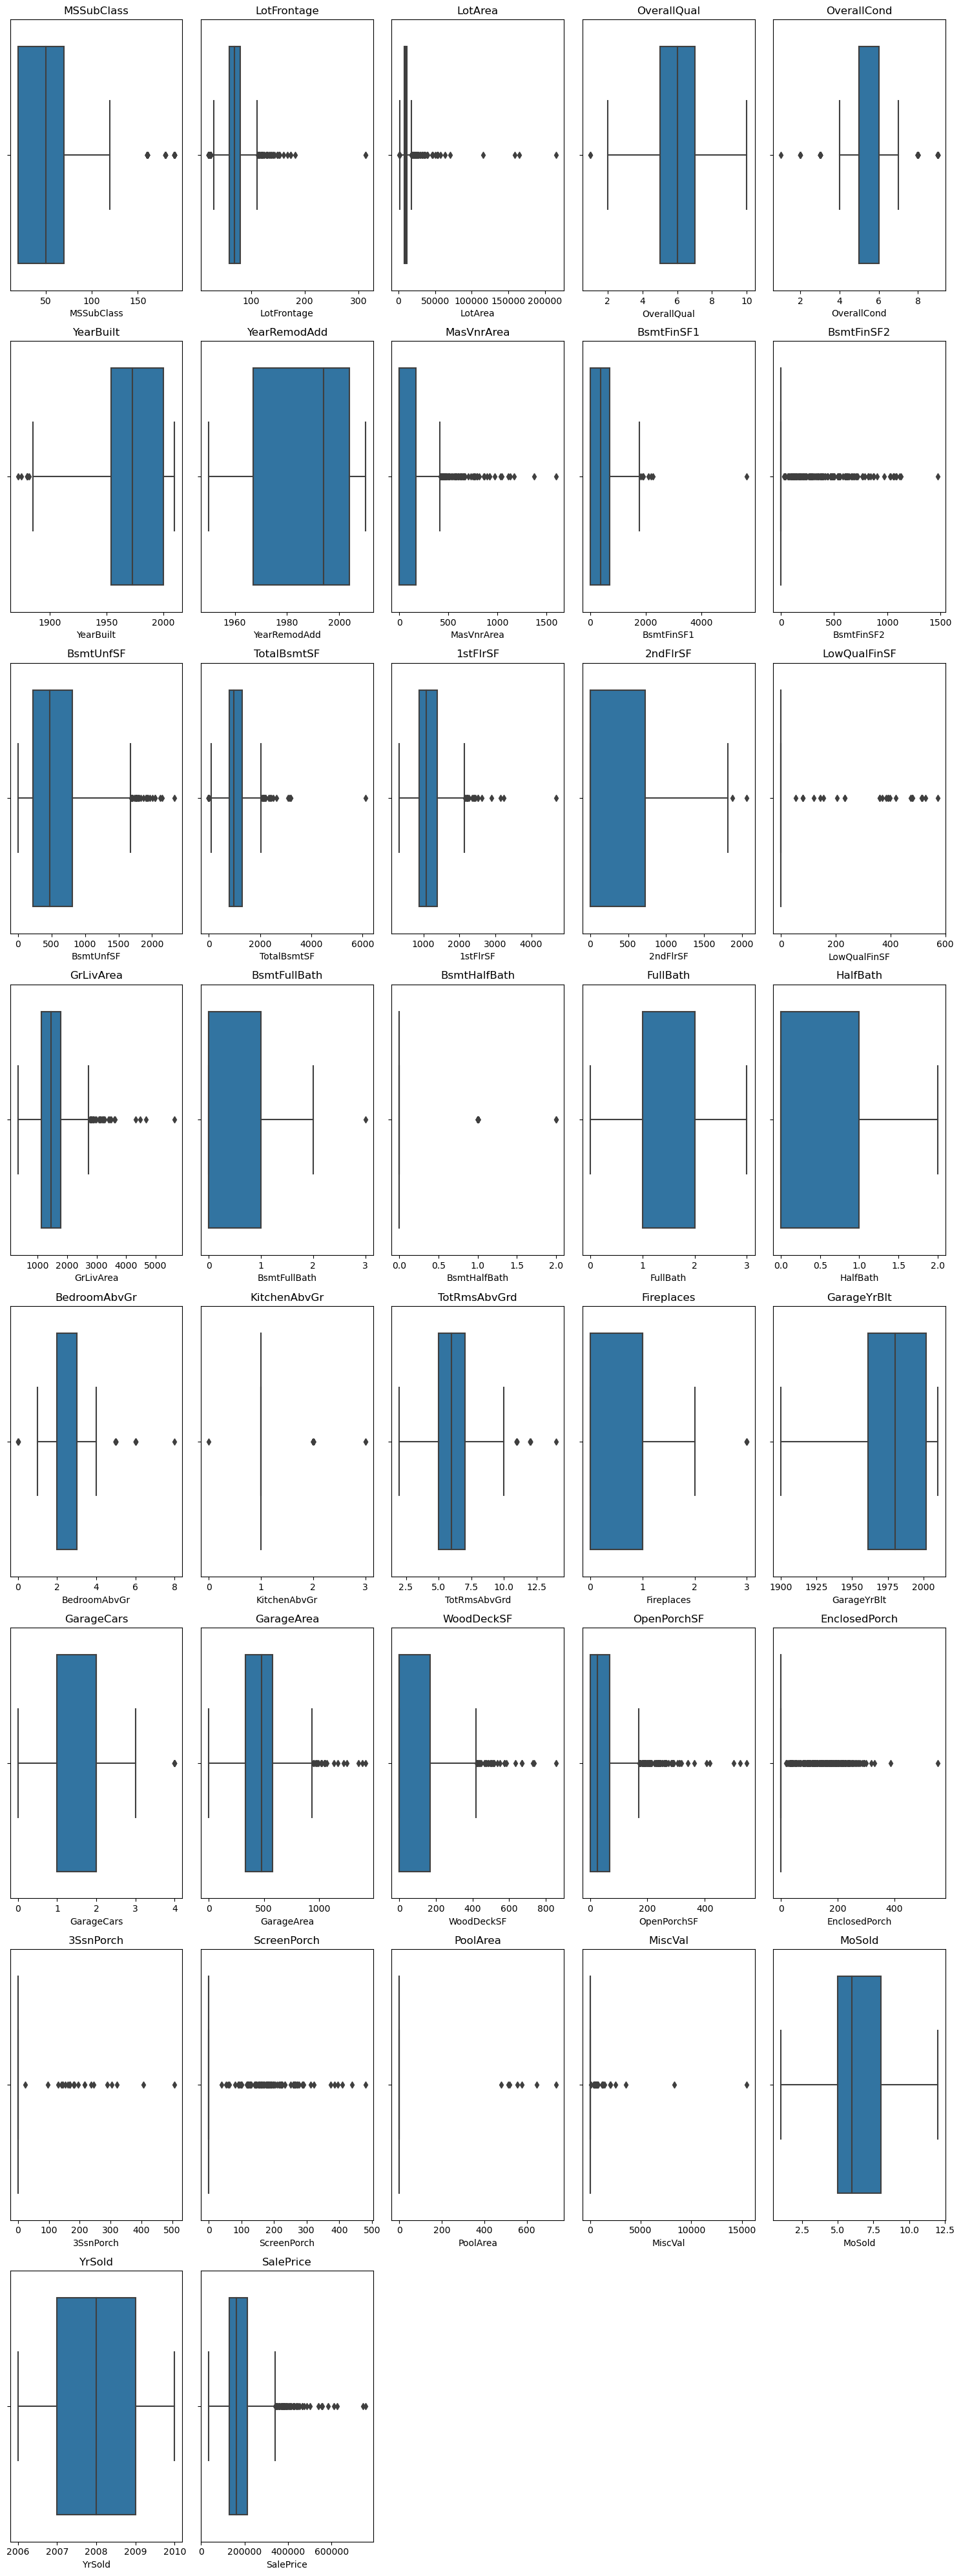

In [8]:
num_features = data.drop(columns='Id').select_dtypes(include=['number'])

total_num_features = len(num_features.columns) # 37


fig , axes = plt.subplots(nrows=8 , ncols = 5 ,figsize=(15,40))
axes = axes.flatten()
for i , col in enumerate(num_features.columns):
    if i < total_num_features :
        sns.boxplot(x =data[col] , ax = axes[i])
        axes[i].set_title(f'{col}')


for i in range(len(num_features.columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()

plt.show()


<Axes: >

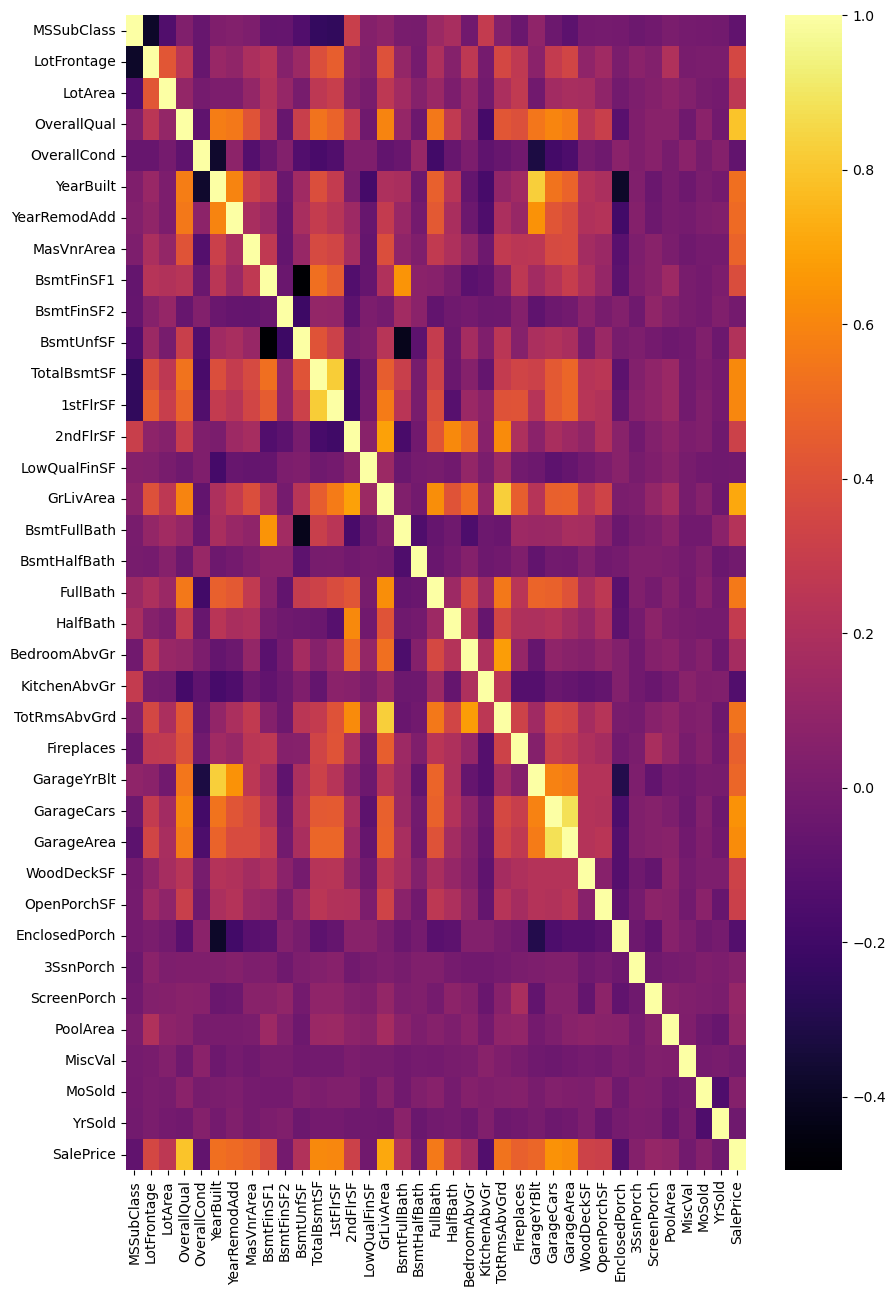

In [9]:
corr_matrix = data.drop(columns='Id').corr(numeric_only = True)
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix , cmap='inferno')

In [10]:
correlations = corr_matrix['SalePrice'].apply(abs).sort_values(ascending=False).reset_index()
print(correlations.shape)
correlations

(37, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


In [11]:
data = data.drop((missing[missing['Total'] > 81]).index,axis=1) # will remove 7 feature
data = data.drop(data.loc[data['Electrical'].isnull()].index) # remove one row that contain NaN
print(f"after deleted columns that has NaN greater than 81 value the shape is : {data.shape}")

after deleted columns that has NaN greater than 81 value the shape is : (1459, 74)


In [12]:
print(f"data with weak correlation = {data.shape}")
data = data.drop(correlations.iloc[21: , 0].values,axis=1)
print(f"data without weak correlation = {data.shape}")

data with weak correlation = (1459, 74)
data without weak correlation = (1459, 58)


In [13]:
cols_name = data.drop(columns="Id").select_dtypes(include=['number']).columns
for col in cols_name :
    NaN_ = data[col].isnull() 
    samples = data[col].dropna().sample(n=NaN_.sum(), replace=True) 
    data.loc[NaN_, col] = samples.values

In [14]:
data.drop(columns="Id").select_dtypes(include=['number']).isnull().sum().sort_values(ascending=False)

LotArea         0
OverallQual     0
OpenPorchSF     0
WoodDeckSF      0
GarageArea      0
GarageCars      0
GarageYrBlt     0
Fireplaces      0
TotRmsAbvGrd    0
HalfBath        0
FullBath        0
GrLivArea       0
2ndFlrSF        0
1stFlrSF        0
TotalBsmtSF     0
BsmtFinSF1      0
MasVnrArea      0
YearRemodAdd    0
YearBuilt       0
SalePrice       0
dtype: int64

In [15]:
cols_name = data.drop(columns="Id").select_dtypes(include=['object']).columns

for col in cols_name :
      mode_ = data[col].mode()[0]
      data[col].fillna(mode_, inplace=True)

data.drop(columns="Id").select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)


MSZoning         0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
BsmtCond         0
Foundation       0
Street           0
ExterCond        0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
SaleCondition    0
dtype: int64

In [16]:
def out_liers(data , col):
    if pd.api.types.is_numeric_dtype(data[col]):
        Q1  , Q3 = np.percentile(data[col] , [25,75])
        IQR = Q3 - Q1
        l_bound = Q1 - (1.5 * IQR) ## Lower Bound
        u_bound = Q3 + (1.5 * IQR) ## Upper Bound
        data = data[(data[col]>=l_bound) & (data[col] <=u_bound)]

    return data

In [17]:
for col in data.columns:
    data = out_liers(data, col)
    print(f'--------------------------------------------------------')
    print(f'Dataset Shape After Removing Outliers From ({col}): {data.shape}\n')

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Id): (1459, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (MSZoning): (1459, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (LotArea): (1391, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Street): (1391, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (LotShape): (1391, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (LandContour): (1391, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (Utilities): (1391, 58)

--------------------------------------------------------
Dataset Shape After Removing Outliers From (LotConfig): (1391, 58)

------------

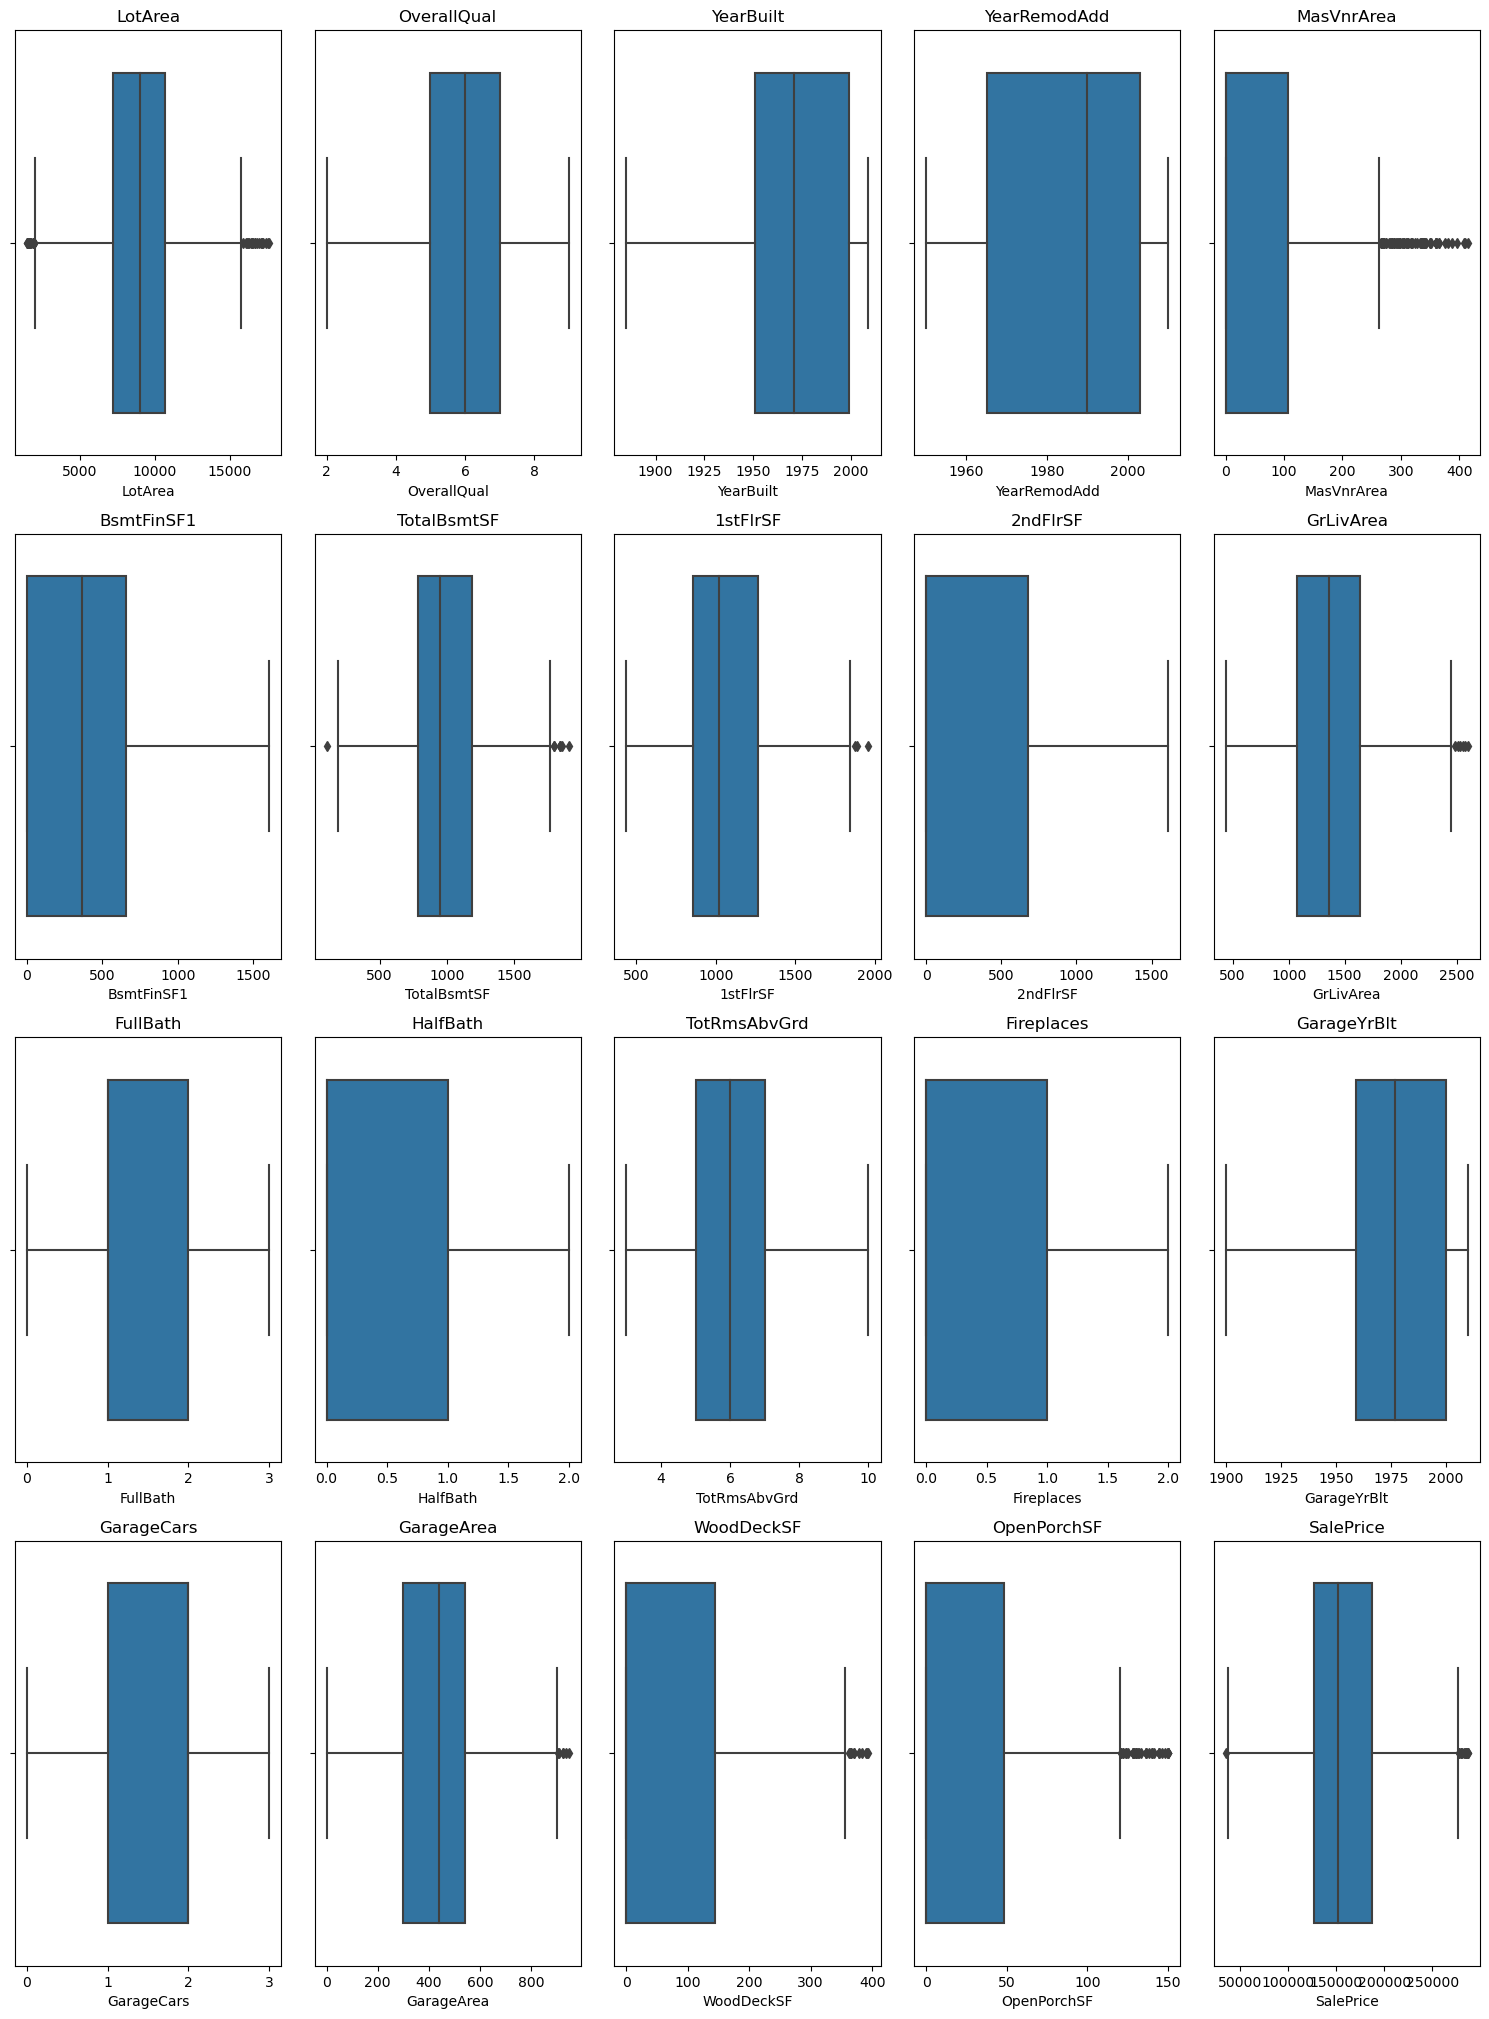

In [18]:
num_features = data.drop(columns='Id').select_dtypes(include=['number'])

total_num_features = len(num_features.columns) # 37


fig , axes = plt.subplots(nrows=8 , ncols = 5 ,figsize=(15,40))
axes = axes.flatten()
for i , col in enumerate(num_features.columns):
    if i < total_num_features :
        sns.boxplot(x =data[col] , ax = axes[i])
        axes[i].set_title(f'{col}')


for i in range(len(num_features.columns), len(axes)):
    fig.delaxes(axes[i])


plt.tight_layout()

plt.show()

In [19]:
cat_cols = data.drop(columns="Id").select_dtypes(include=['object']).columns
cat_cols = pd.DataFrame(cat_cols,columns=["Categorical Cols"])
print(f"Number Of Categorical Cols= {cat_cols.shape}")
cat_cols

Number Of Categorical Cols= (37, 1)


,Categorical Cols
0,MSZoning
1,Street
2,LotShape
3,LandContour
4,Utilities
5,LotConfig
6,LandSlope
7,Neighborhood
8,Condition1
9,Condition2


In [20]:
le = LabelEncoder()
for col in cat_cols.values.flatten():
    data[col] = le.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1061 entries, 0 to 1458
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1061 non-null   int64  
 1   MSZoning       1061 non-null   int32  
 2   LotArea        1061 non-null   int64  
 3   Street         1061 non-null   int32  
 4   LotShape       1061 non-null   int32  
 5   LandContour    1061 non-null   int32  
 6   Utilities      1061 non-null   int32  
 7   LotConfig      1061 non-null   int32  
 8   LandSlope      1061 non-null   int32  
 9   Neighborhood   1061 non-null   int32  
 10  Condition1     1061 non-null   int32  
 11  Condition2     1061 non-null   int32  
 12  BldgType       1061 non-null   int32  
 13  HouseStyle     1061 non-null   int32  
 14  OverallQual    1061 non-null   int64  
 15  YearBuilt      1061 non-null   int64  
 16  YearRemodAdd   1061 non-null   int64  
 17  RoofStyle      1061 non-null   int32  
 18  RoofMatl     

In [21]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1:].values

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler(with_std=True)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
Lr_model = LinearRegression()
Lr_model.fit(X_train, y_train)
y_pred = Lr_model.predict(X_test)

In [25]:
print(f"Training Score: {Lr_model.score(X_train, y_train)}") 
print(f"Testing Score: {Lr_model.score(X_test, y_test)}")

Training Score: 0.8789624120328112
Testing Score: 0.8716498854223764


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [27]:
print(f"\nMAE: {mae}")
print(f"MSE: {mse}")


MAE: 12736.49823742788
MSE: 298996568.2365197


In [28]:
r2 = r2_score(y_test, y_pred)

In [49]:
print(f"Final Acc For Linear Regression Model: {r2}")

Final Acc For Linear Regression Model: 0.88327469742812


In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [45]:
print(f"Training Score: {rf_model.score(X_train, y_train)}") 
print(f"Testing Score: {rf_model.score(X_test, y_test)}")

Training Score: 0.9777731036905263
Testing Score: 0.88327469742812


In [46]:
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

In [47]:
print(f"\nMAE: {mae}")
print(f"MSE: {mse}")


MAE: 12094.910046948356
MSE: 271916117.9576075


In [51]:
r2 = r2_score(y_test, y_pred_rf)

In [56]:
print(f"Final Acc For Random Forest Model: {r2}")

Final Acc For Random Forest Model: 0.88327469742812
